# The Purpose of Quantum Computing


The goal of studying Quantum Computing is to observe what problems these new computers offer a <u>significant speedup</u> to when compared to their classical counterparts.

## Big $O$ and P vs. NP
In theoretical computer science, there is the concept of the **complexity classes**, P and NP.

- P (*Polynomial Time*) refers to problems that a computer algorithm can solve is a <u>non-exponential</u> amount of time.
  - This is referring to any problem done with a time complexity ranging between Constant time: $O(1)$ to Polynomial time: $O(n^k)$ for some positive constant $k$
- NP (*Non-deterministic Polynomial Time*) refers to problems with answers that can be <u>verified</u> in polynomial time but cannot be solved in polynomial time on a deterministic machine
  - This can also be referred to being solvable in polynomial time on a non-deterministic machine
  
### A New Challenger Approaches: BQP

**Bounded-error Quantum Polynomial Time** refers to the complexity class where there exists a quantum algorithm that can solve a problem in polynomial time <u>with a high probability</u> of being correct.

- From this statement, we draw an additional requirement for Quantum Algorithms aside from outputting the correct results in polynomial time.
    - This probability must be, at minimum, $2/3$ of the total outcomes, leaving the other $1/3$ as "error/wrong outputs"
        - Why does this requirement exist? Quantum Computers as they stand today are "noisy", meaning they're prone to errors when conducting quantum algorithms

We outline BQP as a superset of the P complexity class, but it also encapsulates a few NP class problems, and this is where we can express [Quantum Supremacy](https://en.wikipedia.org/wiki/Quantum_supremacy) or Quantum Advantage, the idea that a programmable quantum device can solve a problem in a feasible amount of time that a classical computer cannot.

#### Visual
<div>
<img src="P-Space.jpeg" width="350"/>
</div>

## What does this mean at a less abstract level?
In 2019, Google was the one to demonstrate Quantum Supremacy, which signifies that there are problems that are suited for Quantum Computers to solve. The most applicable of this set of problems is Shor's algorithm, which is designed to split a large number, $N$, and factor it into the prime numbers, $p$ and $q$, such that $p * q = N$. This has massive implications for how messages are sent over the internet, where RSA public keys are sent so that messages can be sent securely using one-way encryption.

## Noise: One thing that holds us back
**Noise** occurs when our qubits change state in some manner. This can come from changes in the state like from $\left| 0 \right\rangle$ to $\left| 1 \right\rangle$ or changes in the phase of the qubit like from $\left| 1 \right\rangle$ to $-\left| 1 \right\rangle$

- In certain implementations of qubits, a potential cause of noise can be from outside particles interacting with our qubit in Quantum Computers that must be kept at <mark style="background: #baf2ef;">near-absolute-zero temperatures</mark>



# Basics to Quantum Algorithms
Before we can jump right into the basics of QA's, there's one last property of qubits we must explore, that being **Phase**.

## Phase & Interference

We work with phase in Quantum Computing similarly to how we work with it in **sound** or **alternating current** in the sense that we're using <u>constructive</u> and <u>destructive interference</u> to make certain outcomes more or less likely; the phase represents some angle that a qubit is currently "oscillating" at. This commonly could be $\pi$, $\frac {\pi}2$ or $\frac \pi 4$, but we can use any angle from $0$ to $2\pi$. 

- On the Bloch Sphere, this is why we have the $z$-axis
- In the Bloch Sphere equation, $\left| \psi \right\rangle = \cos(\frac {\theta}{2})\left| 0 \right\rangle + e^{i\phi}\sin(\frac {\theta}{2})\left| 1 \right\rangle$, it's why we have the Euler Identity: $e^{i\phi} = \cos(\phi) + i\sin(\phi)$


### Phase Kickback
**Phase Kickback** is an interesting phenomenon that's essential for the algorithms we'll be taking a look at. This can shown through 2 qubits, the top one initialized to $\left| 0 \right\rangle$ and the bottom one initialized to $\left| 1 \right\rangle$. When we shoot these qubits through a set of H Gates then a C-Not Gate where the $\left| + \right\rangle$ is the control qubit and the $\left| - \right\rangle$ as the target. After these 2 operations are conducted, we come out with 2 qubits in the $\left| - \right\rangle$ state, and if we use a couple of H Gates to take them out of superposition, we end up with the state, $\left| 11 \right\rangle$.
- The phase of the target qubit gets "kicked up/back" to the control qubit

#### The Math Behind it
1. We're going to start with the tensor product: $\left| 0 \right\rangle\otimes\left| 1 \right\rangle = \left| 01 \right\rangle$
$$
\begin{bmatrix}
0\\
1\\
0\\
0
\end{bmatrix}
$$

2. Next, we apply a set of H Gates that have been put into a tensor product themselves: $H \otimes H$ a.k.a. $H^{2\otimes}$
$$
\frac {1}{2}
\begin{bmatrix}
1 & 1 & 1 & 1\\
1 & -1 & 1 & -1\\
1 & 1 & -1 & -1\\
1 & -1 & -1 & 1
\end{bmatrix}
\begin{bmatrix}
0\\
1\\
0\\
0
\end{bmatrix}
=
\frac {1}{2}
\begin{bmatrix}
1\\
-1\\
1\\
-1
\end{bmatrix}
$$

3. Next, we put this state vector through a C-Not Gate
$$
\frac {1}{2}
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{bmatrix}
\begin{bmatrix}
1\\
-1\\
1\\
-1
\end{bmatrix}
=
\frac {1}{2}
\begin{bmatrix}
1\\
-1\\
-1\\
1
\end{bmatrix}
$$
- This appears as just a swap of the minus sign from the $\left| 11 \right\rangle$ (bottom-most position) to the $\left| 10 \right\rangle$ state (3rd position)
- When we factor this, we get $\big(\frac{1}{\sqrt{2}}(\left| 0 \right\rangle - \left| 1 \right\rangle)\big)^2$

4. Lastly, we put this through another set of H Gates
$$
\frac {1}{2}
*
\frac {1}{2}
\begin{bmatrix}
1 & 1 & 1 & 1\\
1 & -1 & 1 & -1\\
1 & 1 & -1 & -1\\
1 & -1 & -1 & 1
\end{bmatrix}
\begin{bmatrix}
1\\
-1\\
-1\\
1
\end{bmatrix}
=
\frac {1}{4}
\begin{bmatrix}
0\\
0\\
0\\
4
\end{bmatrix}
=
\begin{bmatrix}
0\\
0\\
0\\
1
\end{bmatrix}
$$


#### Visual Representation
<div>
<img src="Kickback2.png" width="700"/>
</div>

#### What's going on here?
Explaining this directly is a bit of a mess, so we're going to use an equivalent gate operation. This will show that we can picture this whole set of operations as the bottom-most qubit affecting the state of its corresponding control qubit.

##### Circuit One

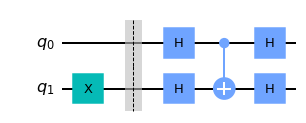

In [1]:
import random
import math

from qiskit import Aer, QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit.tools.visualization import plot_bloch_multivector
%matplotlib inline

circuit_one = QuantumCircuit(2)
circuit_one.x(1)
circuit_one.barrier([0, 1])
circuit_one.h([0, 1])
circuit_one.cnot(0, 1)
circuit_one.h([0, 1])

circuit_one.draw(output='mpl')

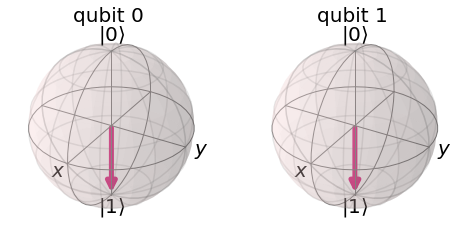

In [2]:
state = Statevector(circuit_one)
plot_bloch_multivector(state)

##### Circuit Two

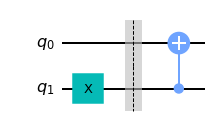

In [3]:
circuit_two = QuantumCircuit(2)

circuit_two.x(1)
circuit_two.barrier([0, 1])
circuit_two.cnot(1, 0)

circuit_two.draw(output='mpl')

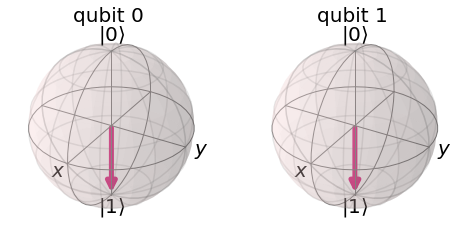

In [4]:
state = Statevector(circuit_two)
plot_bloch_multivector(state)

## Oracle Algorithms

### What are Oracles?

We can think of oracles as black boxes of quantum gate operations; we don't necessarily know what's inside the box, but we can figure it out. The '*Archaic*' definition of the word, oracle, tells us that, if we ask an oracle a question, we should get a response, however obscure or ambiguous it may be.

Let's take the game 'Guess the Number' for example. You ask your friend 'Is it 50?' and they tell you 'Higher'. You go back and forth, asking your friend if it's X number until you arrive at the number your friend was thinking of a.k.a. <u>the correct answer</u>. The same thing happens here, but we're worried about what the oracle does.

Using an $N$ set of qubits with each of them run through an H gate, we can ask an oracle a question and get back some type of results on the input set.

## Basic Oracle Algorithms
This section will be taking a look at the Oracle algorithms that are used as thought experiemnts to get people in the door of Quantum Algorithms.

### Bernstein-Vazirani Oracle (Guess the secret code)
#### Description
Let's say that I locked a safe with a single-digit code from 0-7, then I ask you 'how many guesses would it take for you to crack the safe?'
- Classically
    - In best case: 1 try, a good guess
    - In worse case: 8 tries

With Quantum Computing, we can determine the code in one query (iteration) of the safe lock (oracle). What we first do is create a setup similar to the [Phase Kickback example](#Circuit-One). 
1. For a given $N$-qubit system, we put an X Gate on the last qubit, $q_{N-1}$, then a layer of H Gates on all qubits.
2. We apply the Bernstein Vazirani Oracle to the circuit.
    - This contains the secret code to our safe
3. We apply another layer of H Gates on all qubits
4. Lastly, we measure $q_0$ to $q_{N-2}$ (All but the last qubit) to get the secret code

#### Essential Functions

In [5]:
def generate_bern_vaz_oracle(number_code):
    gate = QuantumCircuit(4)
    if number_code == 0:
        gate.i(3)
        return gate
    
    for i in range(2, -1, -1):
        if number_code & (1 << i) != 0:
            gate.cnot(2 - i, 3)
    
    return gate

def generate_random_number():
    return random.choice([*range(8)])

- The first function is creating the oracle for this circuit to run on where we have a 4-qubit system
    - Under the hood, we're using a set of C-Not gates based on our secret code
        - Let's say that our code is 7, there'd be C-Not Gates applied where the first 3 qubits are used as controls and the last qubit is the target
        - If the code was 4, then we'd only have a C-Not Gate where the control is the first qubit on the last qubit being the target

#### The code for a $4$-qubit system

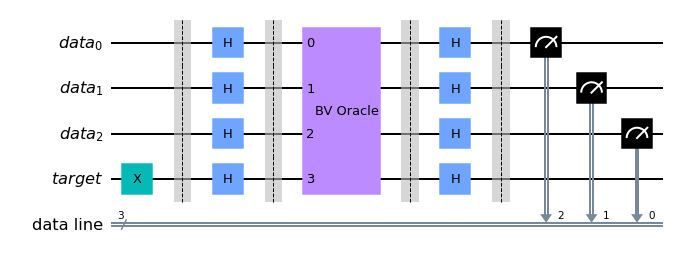

In [22]:
data_qubits = QuantumRegister(3, 'data')
target_qubit = QuantumRegister(1, 'target')

classic_registers = ClassicalRegister(3, 'data line')

bern_vaz_circuit = QuantumCircuit(data_qubits, target_qubit, classic_registers)

# Not Gate on the last qubit
bern_vaz_circuit.x(3)

full_qubit_list = [*range(4)]
input_list = [*range(3)]
reverse_input_list = input_list.copy()
reverse_input_list.reverse()

# First layer of h gates shielded by barriers
bern_vaz_circuit.barrier(full_qubit_list)
bern_vaz_circuit.h(full_qubit_list)
bern_vaz_circuit.barrier(full_qubit_list)
    
# Oracle that uses a random number between 0 and 7 to genrate the secret code
secret_code = generate_random_number()
oracle = generate_bern_vaz_oracle(secret_code).to_gate(label='BV Oracle')
bern_vaz_circuit.append(oracle, full_qubit_list)

# Second layer of h gates shielded by barriers
bern_vaz_circuit.barrier(full_qubit_list)
bern_vaz_circuit.h(full_qubit_list)
bern_vaz_circuit.barrier(full_qubit_list)
    
# Measure the first 3 qubits only
bern_vaz_circuit.measure(input_list, reverse_input_list)

bern_vaz_circuit.draw(output='mpl')

In [23]:
simulator = Aer.get_backend('qasm_simulator')
results = execute(bern_vaz_circuit, backend=simulator, shots=1).result()

counts = results.get_counts()

print(counts)

secret = next(iter(counts))
print(f'Your secret code was {int(secret, 2)}')

{'111': 1}
Your secret code was 7


##### What the intuition?
- Here, we only have `shots=1`, meaning we're doing one iteration, to emphasize that we only need one run to get the secret code
    - More shots aren't bad, they'll just yield the same results
    - From that one shot, we determine the secret code as the 3-digit binary number that represents any number between 0 and 7
- We run the circuit on a QASM simulator to get *quick and ideal* results.
    - Since we have a small circuit containing only a few qubits, simulation is perfect because we don't have to wait for a free Quantum Computer to run our circuit.
    - Experiments that use a larger set of qubits would need the help of actual quantum computers
- To get a different secret code, run [this code](#The-code-for-a-44-qubit-system) again, then the above section

### Deutsch-Jozsa Algorithm
#### Description

Let's say that I give you a function, it takes in one bit of information and outputs one bit of information and your objective is to understand what type of function it is, whether it's a balanced or constant function
- You have 4 options:
    - Identity (Balanced) 
        - $f(0) = 0$
        - $f(1) = 1$
    - Negation (Balanced)
        - $f(0) = 1$
        - $f(1) = 0$
    - Set to 0 (Constant 0)
        - $f(0) = 0$
        - $f(1) = 0$
    - Set to 1 (Constant 1)
        - $f(0) = 1$
        - $f(1) = 1$

How many queries of the function would you need to determine which function you're given?
- Classically, 2 queries everytime
    - You pass the 0 bit in and get some output, let's say 1 ($f(0) = 1$)
        - Now you either know it's negation or set to 1
    - You pass the 1 bit in and get 1 ($f(1) = 1$)
        - Now you know it's the set to 1 function

#### Essential Functions

In [8]:
def create_deutsch_oracle(circuit, code):
    if code == 0: # Identity Case
        circuit.i([0, 1])
    elif code == 1: # Negation Case
        circuit.x([0, 1])
    elif code == 2: # Set 0
        circuit.cnot(0, 2)
        circuit.cnot(1, 2)
    else:           # Set 1
        circuit.cnot(0, 2)
        circuit.cnot(1, 2)
        circuit.x([0, 1])

def generate_deutsch_code():
    return random.choice([*range(4)])

#### The Code

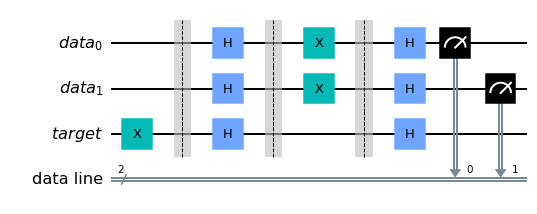

In [9]:
data_qubits = QuantumRegister(2, 'data')
target_qubit = QuantumRegister(1, 'target')

classic_registers = ClassicalRegister(2, 'data line')

deutsch_circuit = QuantumCircuit(data_qubits, target_qubit, classic_registers)

deutsch_circuit.x(2)
deutsch_circuit.barrier([0, 1, 2])
deutsch_circuit.h([0, 1, 2])
deutsch_circuit.barrier([0, 1, 2])
create_deutsch_oracle(deutsch_circuit, generate_deutsch_code())
deutsch_circuit.barrier([0, 1, 2])
deutsch_circuit.h([0, 1, 2])
deutsch_circuit.measure([0, 1], [0, 1])

deutsch_circuit.draw(output='mpl')


In [10]:
results = execute(deutsch_circuit, backend=simulator, shots=1).result()
print(results.get_counts())

{'00': 1}


##### What the intuition?
- If the value measured from the data line is `'00'`, then we know the function is **constant** because there's no correlation between the input and output, or in this case, the target qubit and the data qubits.
- If the value measured is `'11'`, then we know the function to be **balanced**

### General Importance
These are rather small examples that we used, but imagine if we had a larger input set of *data qubits*

#### General BernVaz Algorithm

In [11]:
def generate_general_bern_vaz_oracle(number_code, number_of_data_qubits):
    gate = QuantumCircuit(number_of_data_qubits+1)
    if number_code == 0:
        gate.i(number_of_data_qubits)
        return gate
    
    last_data_qubit = number_of_data_qubits - 1
    
    for i in range(last_data_qubit, -1, -1):
        if number_code & (1 << i) != 0:
            gate.cnot(last_data_qubit - i, number_of_data_qubits)
    
    return gate


def generate_random_number_by_param(number_of_bits):
    return random.choice([*range(2**number_of_bits)])


def create_general_bern_vaz_algorithm(number_of_data_qubits):
    data_list = [*range(number_of_data_qubits)]
    rev_data_list = data_list.copy()
    rev_data_list.reverse()
    full_list = [*range(number_of_data_qubits + 1)]
    
    data_qubits = QuantumRegister(number_of_data_qubits, 'data')
    target_qubit = QuantumRegister(1, 'target')

    classic_registers = ClassicalRegister(number_of_data_qubits, 'data line')

    bv_circuit = QuantumCircuit(data_qubits, target_qubit, classic_registers)
    bv_circuit.x(number_of_data_qubits)
    
    # First layer of h gates shielded by barriers
    bv_circuit.barrier(full_list)
    bv_circuit.h(full_list)
    bv_circuit.barrier(full_list)
    
    secret_code = generate_random_number_by_param(number_of_data_qubits)
    
    oracle = generate_general_bern_vaz_oracle(secret_code, number_of_data_qubits).to_gate(label='BV Oracle')
    bv_circuit.append(oracle, full_list)
    
    
    # Second layer of h gates shielded by barriers
    bv_circuit.barrier(full_list)
    bv_circuit.h(full_list)
    bv_circuit.barrier(full_list)
    
    bv_circuit.measure(data_list, rev_data_list)
    
    return bv_circuit


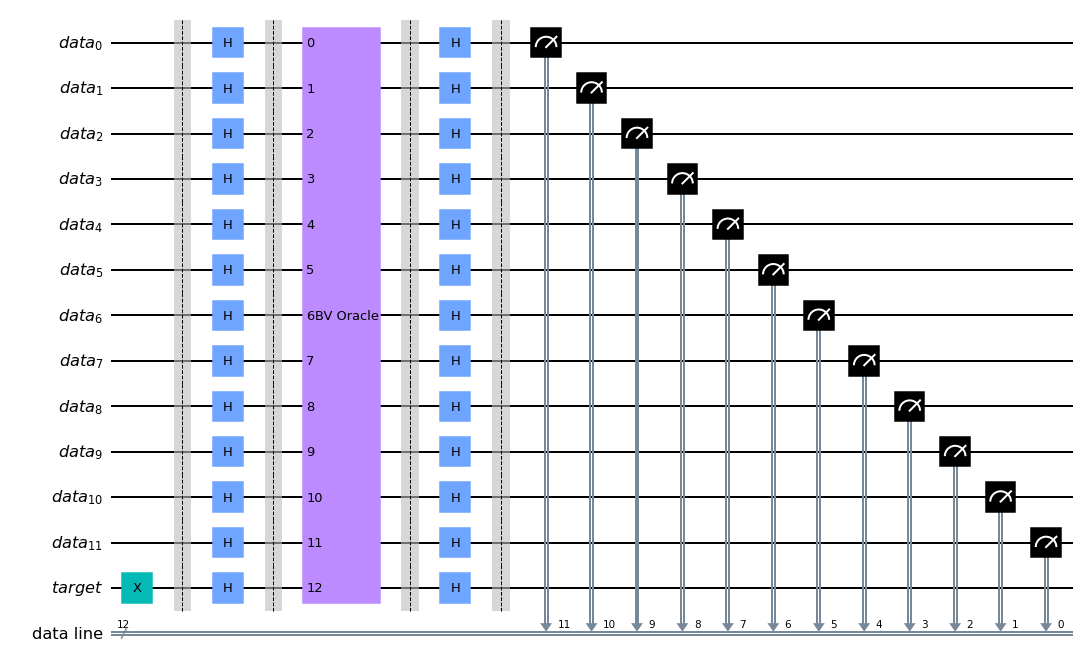

In [19]:
bv = create_general_bern_vaz_algorithm(12)

bv.draw(output='mpl')

In [21]:
results = execute(bv, backend=simulator, shots=1).result()

counts = results.get_counts()

print(counts)

secret = next(iter(counts))
print(f'Your secret code was {int(secret, 2)}')

{'000100010100': 1}
Your secret code was 276


#### General Deutsch Algorithm

In [14]:
def create_general_deutsch_oracle(circuit, code, data_list):
    if code == 0: # Identity Case
        circuit.i(data_list)
    elif code == 1: # Negation Case
        circuit.x(data_list)
    elif code == 2: # Set 0
        for i in data_list:
            circuit.cnot(i, len(data_list))
    else:           # Set 1
        for i in data_list:
            circuit.cnot(i, len(data_list))
        circuit.x(data_list)
        
        

def create_general_deutsch_algorithm(number_of_data_qubits):
    data_qubits = QuantumRegister(number_of_data_qubits, 'data')
    target_qubit = QuantumRegister(1, 'target')

    classic_registers = ClassicalRegister(number_of_data_qubits, 'data line')

    deutsch_circuit = QuantumCircuit(data_qubits, target_qubit, classic_registers)
    
    data_list = [*range(number_of_data_qubits)]
    full_list = [*range(number_of_data_qubits+1)]
    
    deutsch_circuit.x(number_of_data_qubits)
    deutsch_circuit.barrier(full_list)
    deutsch_circuit.h(full_list)
    deutsch_circuit.barrier(full_list)
    create_general_deutsch_oracle(deutsch_circuit, generate_deutsch_code(), data_list)
    deutsch_circuit.barrier(full_list)
    deutsch_circuit.h(full_list)
    deutsch_circuit.measure(data_list, data_list)
    
    
    
    return deutsch_circuit

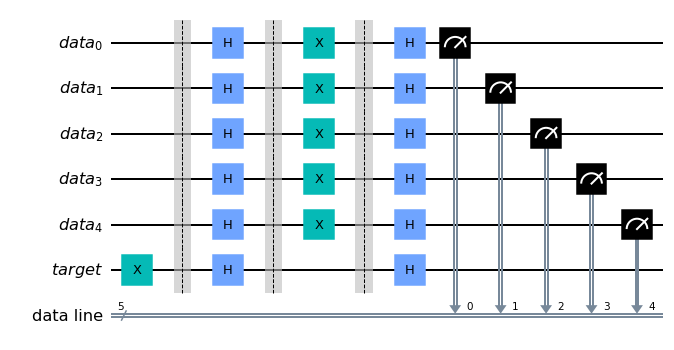

In [15]:
deutsch_cir = create_general_deutsch_algorithm(5)

deutsch_cir.draw(output='mpl')

In [16]:
results = execute(deutsch_cir, backend=simulator, shots=1).result()
print(results.get_counts())

{'00000': 1}
